In [1]:

import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

# Analysis of results + runtime

In [24]:
test = open("execution_times.txt")
results = [x for x in test]

# Function to read output.txt files
# Returns data in the form of scores and execution times
# in two collections: one for the fullsearch algorithm and another
# for the greedy algorithm
def open_results(filename):
    f = open(filename)
    results = [line for line in f][1:]
    
    # Line at which fullsearch results stop and greedy results start
    step = 0
    
    fullsearch_results = []
    for i, line in enumerate(results):
        if line == "None":
            print("None-line")
            continue
        if line == "\n":
            step = i
            break
        line_stripped = [result for result in line.strip("\n").split(" ")]
        fullsearch_results.append((float(line_stripped[0]), 
                                   float(line_stripped[1])))
        
    greedy_results = []
    for line in results[step + 1:]:
        if line == "None":
            print("None-line")
            continue
        line_stripped = [result for result in line.strip("\n").split(" ")]
        greedy_results.append((float(line_stripped[0]), 
                                   float(line_stripped[1])))
    
    return fullsearch_results, greedy_results
    


fullsearch_results, greedy_results = open_results("execution_times.txt")

print(len(fullsearch_results))
display(fullsearch_results[0:5])
print(len(greedy_results))
display(greedy_results[0:5])

100


[(0.01772533300027135, 25.5),
 (0.011328389002301265, 24.5),
 (0.006796233999921242, 23.0),
 (0.009366980000777403, 26.5),
 (0.016727794998587342, 22.5)]

100


[(0.0006449960019381251, 25.5),
 (0.0006292359976214357, 24.5),
 (0.0005340560019249097, 23.0),
 (0.0012128449998272117, 22.0),
 (0.0021109230001457036, 22.0)]

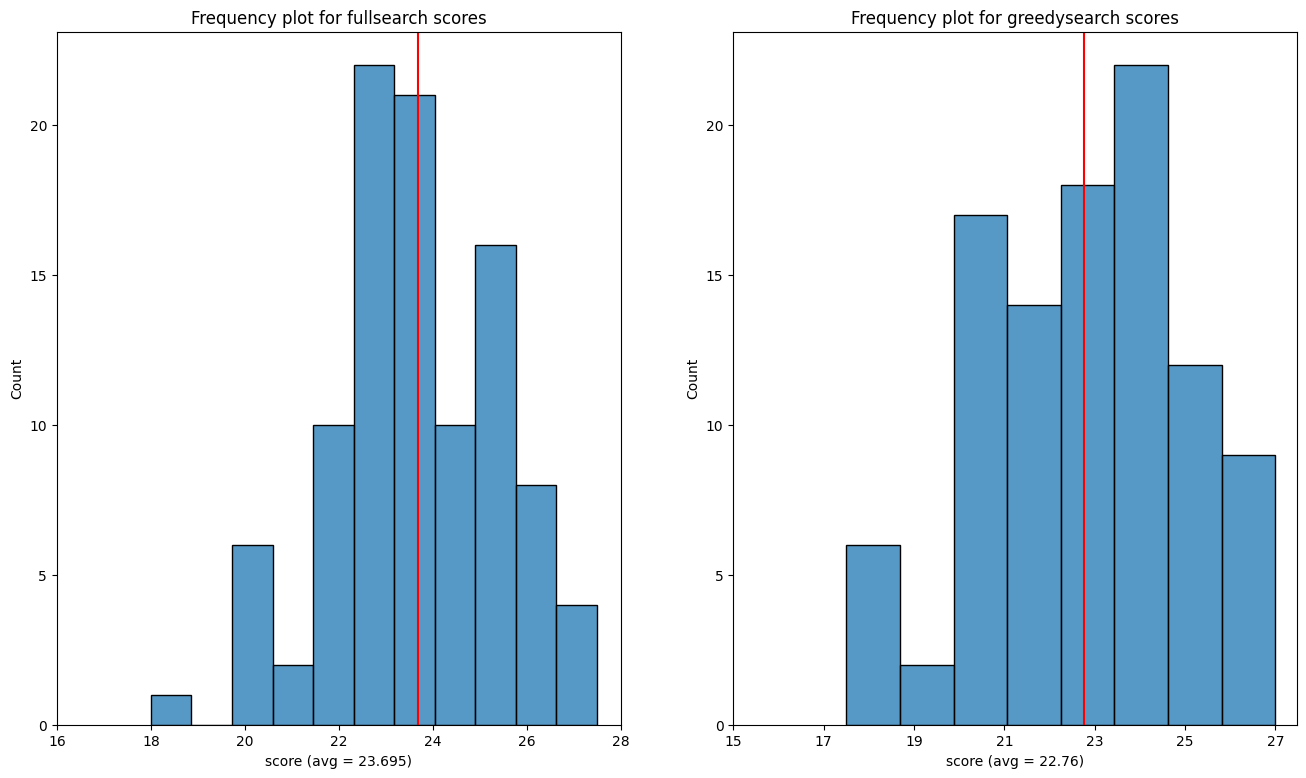

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16,9))

# fullsearch scores
fullsearch_scores = [x[1] for x in fullsearch_results]
g = sn.histplot(x = fullsearch_scores, ax = axs[0])
axs[0].axvline(np.mean(fullsearch_scores), color = "red")

xrange = list(range(int(min(fullsearch_scores)) - 2, int(max(fullsearch_scores)) + 2, 2))
g.set(xticks=xrange, title = "Frequency plot for fullsearch scores", xlabel = "score (avg = " + str(np.mean(fullsearch_scores)) + ")")



# Greedy scores
greedy_scores = [x[1] for x in greedy_results]
g2 = sn.histplot(x = greedy_scores, ax = axs[1])
axs[1].axvline(np.mean(greedy_scores), color = "red")

xrange = list(range(int(min(greedy_scores)) - 2, int(max(greedy_scores)) + 2, 2))
g2.set(xticks=xrange, title = "Frequency plot for greedysearch scores", xlabel = "score (avg = " + str(np.mean(greedy_scores)) + ")")


plt.show()

Above results are 100 runs for each algorithm where: \
amount of literals per clause = 5\
amount of variables (literals) to choose from = 20 \
amount of clauses to generate = 5

Runs are executed in parallel, meaning each run a set of clauses is generated, then that same set is used by both algorithms.

In [7]:
fullsearch_std = np.std(fullsearch_scores)
greedy_std = np.std(greedy_scores)

print("Standard deviation of fullsearch_scores: ", fullsearch_std)
print("Standard deviation of greedy_scores: ", greedy_std)


Standard deviation of fullsearch_scores:  1.756267348668761
Standard deviation of greedy_scores:  2.2186482371029435


## Influence of expression structure